# Part 3. Model Building and Evaluation
-------------------------------------------------------------------------------------------------------------------

## 2. Random Forest Algorithm

### 1) Data Preparation

In [23]:
#------------------------------------------------------------------------------------
# Input dataset : Case 1. 8 important features without PCA
#                 Case 2. first 2 components with PCA
#                 Case 3. first 6 components with PCA
#------------------------------------------------------------------------------------

# Import libraries and load cleansed sample dataset
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

loans_sampled = pd.read_csv("./dataset/loans_cleansed_sample.csv")
# ＠Case (1) 8 important features in the Random Forest without PCA
#        - Need to comment PCA reduction codes below
#        - Need to chanage SMOTENC() to SMOTE() below
# --------------------------------------------------------------------------------------
# loans_sampled = pd.read_csv("./dataset/loans_cleansed_sample.csv",
#                            usecols = ['recoveries', 'inq_last_6mths', 'int_rate', 
#                                       'total_pymnt', 'loan_amnt', 'dti', 'revol_util', 
#                                       'annual_inc', 'default_loan'])
loans_sampled.shape

# Next Steps: 1) Split --> 2) Scaling --> 3) SMOTE --> 4) PCA reduction

(8556, 25)

In [24]:
loans_sampled.columns
# 8 important features: recoveries, inq_last_6mths, int_rate, total_pymnt, loan_amnt, dti, revol_util, annual_inc

Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'inq_last_6mths',
       'revol_util', 'total_pymnt', 'total_rec_late_fee', 'recoveries',
       'collections_12_mths_ex_med', 'default_loan', 'purpose_car',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],
      dtype='object')

In [25]:
# 1) Splitting the dataset into test and train set
from sklearn.model_selection import train_test_split
y = loans_sampled['default_loan']
X = loans_sampled.drop('default_loan', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2019)

# 2) Scaling through standardisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # mean : 0, standard deviation : 1
sc.fit(X_train) # fit only a train dataset
X_train = sc.transform(X_train)
X_test = sc.transform(X_test) # Do not fit a test dataset

# ***************************************************************************************************
# 3) Oversampling for data that have both categorical and non-categorical attributes
# Data Imbalance - label'0' : 95%, '1' : 5%
# from imblearn.over_sampling import SMOTENC
# ***************************************************************************************************
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
# sm = SMOTENC(random_state = 2020, categorical_features = [9, 23])
sm = SMOTE(random_state = 2020)
X_train, y_train = sm.fit_sample(X_train, y_train.ravel())

# Check oversampling results
print('After Oversampling, train_X shape : {}'.format(X_train.shape))
print('After Oversampling, train_y shape : {} \n'.format(y_train.shape))

print("After Oversampling, label count '1': {}".format(sum(y_train == 1)))
print("After Oversampling, label count '0': {}".format(sum(y_train == 0)))

# 4) Dimensionality Reduction using PCA(Principal Component Analysis)
# from sklearn.decomposition import PCA
# ***************************************************************************************************
# Adjust input features in the course of model selection
# pca = PCA(n_components = 9) # Test 0.750 Explained variance ratio for first 9 - 13 componets
# pca = PCA(n_components = 2) # ＠ Case (2) the first 2 components
# pca = PCA(n_components = 6) # ＠ Case (3) the first 6 components
# ***************************************************************************************************
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)
# pca_reduction = pd.DataFrame(data = X_train)

# print(f"explained_variance = {pca.explained_variance_ratio_}") 
# print(f"pca_reduction.shape : {pca_reduction.shape}")

After Oversampling, train_X shape : (10006, 24)
After Oversampling, train_y shape : (10006,) 

After Oversampling, label count '1': 5003
After Oversampling, label count '0': 5003


### 2) Base Model Development

In [26]:
# pca_reduction.head(3)

Working Time: 0.12052938540776571 min


----------------- Random Forest Performance -----------------


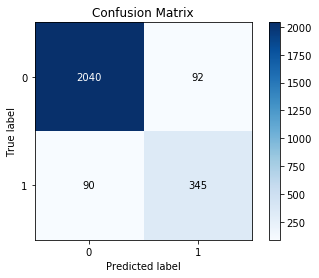

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2132
           1       0.79      0.79      0.79       435

    accuracy                           0.93      2567
   macro avg       0.87      0.87      0.87      2567
weighted avg       0.93      0.93      0.93      2567



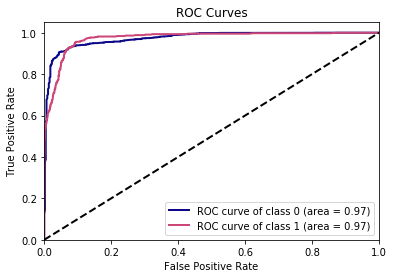

In [27]:
# Random Forest base model
from sklearn.ensemble import RandomForestClassifier
import time
start_time = time.time() # Print Code Running time

# Best parameters: {'weights': 'distance', 'p': 3, 'n_neighbors': 3, 'leaf_size': 8, 'algorithm': 'auto'}
    
model = RandomForestClassifier(n_estimators = 800, random_state = 1)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
probas = model.predict_proba(X_test) # Calculate probabilities to draw a ROC curve

# Print Code Running time
print("Working Time: {} min".format((time.time() - start_time)/60))

# Check performance of the model
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import scikitplot as skplt 

print("\n\n----------------- Random Forest Performance -----------------")
skplt.metrics.plot_confusion_matrix(y_test, prediction)
plt.show()
print(classification_report(y_test, prediction))
# Draw the ROC curve
skplt.metrics.plot_roc(y_test, probas, cmap = 'plasma', plot_micro = False, plot_macro = False)
plt.show()

In [28]:
# Check hyperparameters of the base model
model.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 800,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

### 3) Model Validation

In [29]:
# k-fold cross validation
from sklearn.model_selection import cross_val_score, cross_validate
import time
start_time = time.time() # Print Code Running time

# Performance metrics : validate 'accuracy',  among: (1) roc_auc, (2) reacll, (3) f1_score (4) accuracy
metrics = ['roc_auc', 'accuracy', 'recall_weighted', 'f1_weighted']
for i in range(0, len(metrics)):
    scores = pd.DataFrame(cross_validate(model, X_train, y_train, 
                                         n_jobs = -1, 
                                         cv = 10, 
                                         scoring = metrics,
                                         return_train_score = False))
    print("[%s] average score: %.4f" % (metrics[i], scores['test_'+ metrics[i]].mean()))
    
# Print Code Running time
print("Working Time: {} min".format((time.time() - start_time)/60))

[roc_auc] average score: 0.9952
[accuracy] average score: 0.9645
[recall_weighted] average score: 0.9645
[f1_weighted] average score: 0.9645
Working Time: 1.6238631725311279 min


In [30]:
# Check scores of all performance metrics
scores.sort_values(by = 'test_roc_auc', ascending = False)

,fit_time,score_time,test_roc_auc,test_accuracy,test_recall_weighted,test_f1_weighted
9,7.760473,0.624862,0.998808,0.986000,0.986000,0.986000
5,14.716946,1.499646,0.998302,0.982000,0.982000,0.981997
2,14.670079,1.359056,0.998104,0.976048,0.976048,0.976043
6,14.748187,1.437163,0.997518,0.971000,0.971000,0.970990
3,14.498243,1.265329,0.997154,0.979000,0.979000,0.978995
4,14.763808,1.437163,0.996398,0.974000,0.974000,0.973996
8,7.760473,0.624862,0.996148,0.961000,0.961000,0.960986
7,14.545111,1.452782,0.995716,0.966000,0.966000,0.965989
0,14.576352,1.515306,0.989920,0.931138,0.931138,0.931063
1,14.467001,1.296571,0.983476,0.919162,0.919162,0.919103


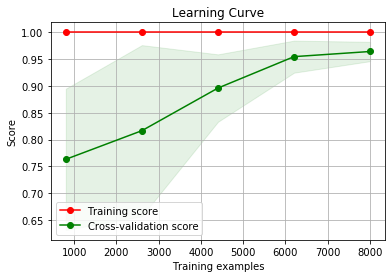

In [31]:
# Learning Curve validation
skplt.estimators.plot_learning_curve(model, X_train, y_train, cv = 5)
plt.show()

[Interpretation]
<ul>
    <li>The graph shows reasonably proper deviation-variance trade-off.</li>
    <li>It seems neither overfitting nor underfitting.</li>
</ul>

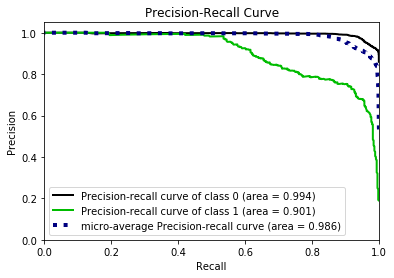

In [32]:
# Precision-Recall Curve validation
skplt.metrics.plot_precision_recall(y_test, probas)
plt.show()

[Interpretation]
<ul>
    <li>Micro-average P-R curve shows as appropirate but class 1 curve area is quite low.</li>
    <li>The balance between Recall and Precision can be made it by improving Precision of class 1.</li>
</ul>

### 4) Hyperparameter Tuning and Model Selection

 ### 4-1. Randomised Search Application

Best score : 0.9962
Best parameters: {'n_estimators': 1800, 'max_depth': 70, 'bootstrap': False}
Working Time: 17.122450617949166 min


----------------- Random Forest Performance -----------------


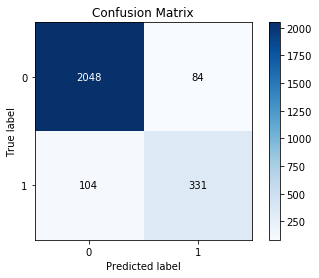

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2132
           1       0.80      0.76      0.78       435

    accuracy                           0.93      2567
   macro avg       0.87      0.86      0.87      2567
weighted avg       0.93      0.93      0.93      2567



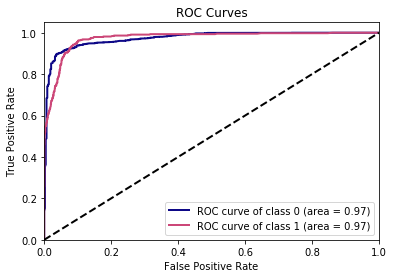

In [33]:
# Randomised Search for Hyperparameter Tuning
# Even faster than Grid Search or Nested CV
from sklearn.model_selection import RandomizedSearchCV
import time
start_time = time.time() # Print Code Running time

# Hyperparameters Set
parameters = {'bootstrap': [True, False],
              'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#               'max_features': ['auto', 'sqrt'],
#               'min_samples_leaf': [1, 2, 4],
#               'min_samples_split': [2, 5, 10],
              'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}  

# Run randomized search
n_iteration = 20
rs = RandomizedSearchCV(model, 
                        param_distributions = parameters,
                        n_iter = n_iteration,
                        scoring = 'roc_auc',
                        cv = 5)
rs.fit(X_train, y_train)

result = pd.DataFrame(rs.cv_results_['params'])
result['mean_test_score'] = rs.cv_results_['mean_test_score']
result.sort_values(by = 'mean_test_score', ascending = False)

# Check best parameters
print("Best score : %0.4f" % rs.best_score_)
print(f"Best parameters: {rs.best_params_}")

# Tuned Model construction
model = rs.best_estimator_
model.fit(X_train, y_train)
prediction = model.predict(X_test)
probas = model.predict_proba(X_test)

# Save the model to disk using Pickle
import pickle

filename = './models/final_Model_RF.sav'
pickle.dump(model, open(filename, 'wb'))

# Check performance of the model
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import scikitplot as skplt 

# Print Code Running time
print("Working Time: {} min".format((time.time()-start_time)/60))

print("\n\n----------------- Random Forest Performance -----------------")
skplt.metrics.plot_confusion_matrix(y_test, prediction)
plt.show()
print(classification_report(y_test, prediction))
# Draw the ROC curve
skplt.metrics.plot_roc(y_test, probas, cmap = 'plasma', plot_micro = False, plot_macro = False)
plt.show()

In [34]:
model.get_params()

{'bootstrap': False,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 70,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1800,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

[Interpretation]
<ul>
    <li>There is a very slight <b><u>no difference between a base model and a tuned one.</b></u></li>
    <li>Performance improvement expectations : 1 - 2 % point of increase</li>
</ul>

### 4-2. Grid Search Application

Best score : 0.9962
Best parameters: {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 2000}
Working Time: 259.3305121779442 min


----------------- Random Forest Performance -----------------


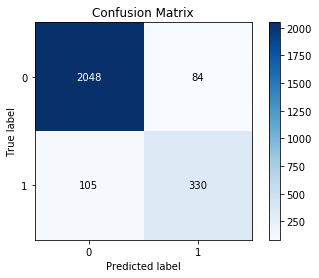

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2132
           1       0.80      0.76      0.78       435

    accuracy                           0.93      2567
   macro avg       0.87      0.86      0.87      2567
weighted avg       0.93      0.93      0.93      2567



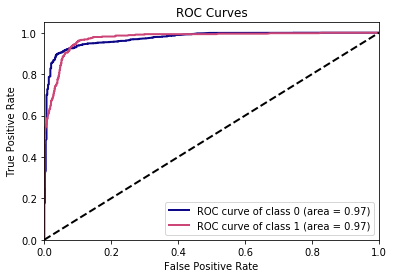

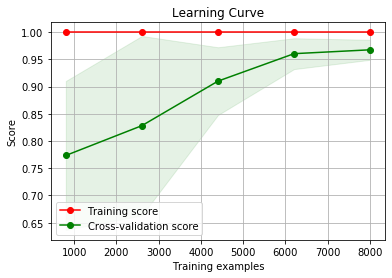

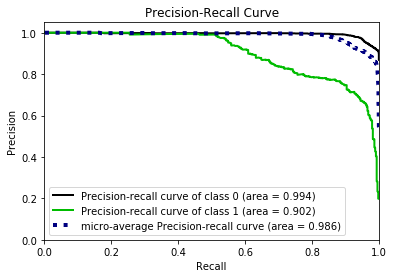

In [35]:
# Grid Search for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
import time
start_time = time.time() # Print Code Running time

# Hyperparameters Set
# Adjust parameters in order to decrease computational time
parameters = {'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], # number of trees
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
#               'max_features': ['auto', 'sqrt'],
#               'bootstrap': [True, False],
              'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]} # depth of each tree

# Focus on 'recall' and 'roc_auc' metrics due to computational complexity
# Sensitiviy is far more important to predict loan defalult than others.
# This requires high level of computing power
gs = GridSearchCV(model, 
                  param_grid = parameters, 
                  scoring = 'roc_auc',
                  n_jobs = -1, 
                  cv = 5)
gs.fit(X_train, y_train)

result = pd.DataFrame(gs.cv_results_['params'])
result['mean_test_score'] = gs.cv_results_['mean_test_score']
result.sort_values(by = 'mean_test_score', ascending = False)

# Check best parameters
print("Best score : %0.4f" % gs.best_score_)
print(f"Best parameters: {gs.best_params_}")

# Tuned Model construction
model = gs.best_estimator_
model.fit(X_train, y_train)
prediction = model.predict(X_test)
probas = model.predict_proba(X_test)

# Check performance of the model
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import scikitplot as skplt 

# Print Code Running time
print("Working Time: {} min".format((time.time() - start_time)/60))

print("\n\n----------------- Random Forest Performance -----------------")
skplt.metrics.plot_confusion_matrix(y_test, prediction)
plt.show()
print(classification_report(y_test, prediction))

# Draw the ROC curve
skplt.metrics.plot_roc(y_test, probas, cmap = 'plasma', plot_micro = False, plot_macro = False)
plt.show()

# Learning Curve validation
skplt.estimators.plot_learning_curve(model, X_train, y_train, cv = 5)
plt.show()

# Precision-Recall Curve validation
skplt.metrics.plot_precision_recall(y_test, probas)
plt.show()

### 4-3. Nested Cross Validation with Grid Search

CV Accuracy: 0.996 +/- 0.004
 CV Scores: [0.9884067  0.99814322 0.99800898 0.997615   0.9980315 ]
Best Score: 0.9944814437176662
Best Parameters: {'max_depth': 40, 'n_estimators': 800}
Working Time: 51.369179077943166 min


----------------- Random Forest Performance -----------------


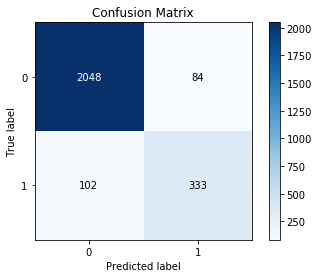

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2132
           1       0.80      0.77      0.78       435

    accuracy                           0.93      2567
   macro avg       0.88      0.86      0.87      2567
weighted avg       0.93      0.93      0.93      2567



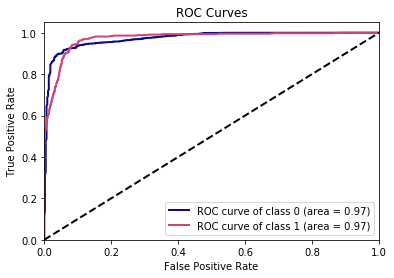

In [36]:
# Nested Cross Validation : 5*2 Cross Validation
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score, auc, f1_score, accuracy_score
import time
start_time = time.time() # Print Code Running time

# Hyperparameters Set
# Adjust parameters in order to decrease computational time
parameters = {'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], # number of trees
#               'min_samples_leaf': [1, 2, 4],
#               'min_samples_split': [2, 5, 10],
#               'max_features': ['auto', 'sqrt'],
#               'bootstrap': [True, False],
              'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]} # depth of each tree
# Scoring
nested_gs = GridSearchCV(model, 
                         param_grid = parameters, 
                         scoring = 'roc_auc',
                         n_jobs = -1, 
                         cv = 2)
scores = cross_val_score(nested_gs, 
                         X_train, 
                         y_train, 
                         scoring = 'roc_auc',
                         n_jobs = -1, 
                         cv = 5)

print("CV Accuracy: %.3f +/- %.3f" % (np.mean(scores), np.std(scores)))
print(f" CV Scores: {scores}")

model = nested_gs.fit(X_train, y_train)
print(f"Best Score: {nested_gs.best_score_}")
print(f"Best Parameters: {nested_gs.best_params_}")

model = nested_gs.best_estimator_
model.fit(X_train, y_train)
prediction = model.predict(X_test)
probas = model.predict_proba(X_test)

# Print Code Running time
print("Working Time: {} min".format((time.time() - start_time)/60))

print("\n\n----------------- Random Forest Performance -----------------")
skplt.metrics.plot_confusion_matrix(y_test, prediction)
plt.show()
print(classification_report(y_test, prediction))
# Draw the ROC curve
skplt.metrics.plot_roc(y_test, probas, cmap = 'plasma', plot_micro = False, plot_macro = False)
plt.show()



----------------- Random Forest Performance -----------------


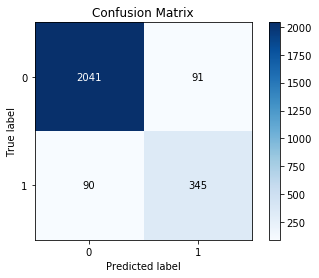

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2132
           1       0.79      0.79      0.79       435

    accuracy                           0.93      2567
   macro avg       0.87      0.88      0.87      2567
weighted avg       0.93      0.93      0.93      2567



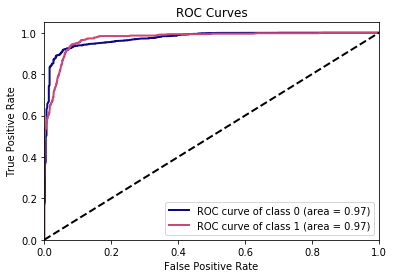

In [44]:
# Manual selection of models
from sklearn.ensemble import RandomForestClassifier
import time
start_time = time.time() # Print Code Running time

# Best parameters: {'weights': 'distance', 'p': 3, 'n_neighbors': 3, 'leaf_size': 8, 'algorithm': 'auto'}
# parameters = {'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], # number of trees
#               'min_samples_leaf': [1, 2, 4],
#               'min_samples_split': [2, 5, 10],
#               'max_features': ['auto', 'sqrt'],
#               'bootstrap': [True, False],
#               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]} # depth of each tree

model = RandomForestClassifier(n_estimators = 800, max_depth = 40)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
probas = model.predict_proba(X_test) # Calculate probabilities to draw a ROC curve

# Check performance of the model
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import scikitplot as skplt 

print("\n\n----------------- Random Forest Performance -----------------")
skplt.metrics.plot_confusion_matrix(y_test, prediction)
plt.show()
print(classification_report(y_test, prediction))
# Draw the ROC curve
skplt.metrics.plot_roc(y_test, probas, cmap = 'plasma', plot_micro = False, plot_macro = False)
plt.show()